### 목표
- 키와 몸무게 데이터를 통하여 BMI예측하기 

### 머신러닝 7과정
1. 문제정의 
2. 데이터수집
3. 데이터 전처리
4. EDA(탐색적 데이터 분석)
5. 모델 선택 및 하이퍼 파라미터 조절
6. 모델 학습
    - model.fit(훈련용 문제, 훈련용 정답)
7. 모델 평가
    - model.predict(테스트용 문제) -> 결과와 테스트용 정답과 비교 

1. 문제정의

In [2]:
# 라이브러리 불러오기 
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 표를 다룰때 사용
import matplotlib.pyplot as plt # 그래프(시각화) 라이브러리
# 머신러닝 라이브러리 
from sklearn.neighbors import KNeighborsClassifier # knn 분류 모델
from sklearn.metrics import accuracy_score # 분류용 모델 평가도구 (정확도)

2. 데이터 수집
 - bmi500.csv

In [3]:
# 데이터 불러오기 
data = pd.read_csv('data/bmi_500.csv', index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [4]:
# 데이터 확인
# 데이터 크기확인(shape)
data.shape
# 행, 열  -> 500명에 대한 데이터

(500, 3)

In [5]:
X = data.loc[:,'Height':'Weight']
y = data.index

In [6]:
# 2. 문제, 정답데이터 크기 확인
print(X.shape, y.shape)

(500, 2) (500,)


In [7]:
# 3. 데이터 전처리
# ㄴ 이상치, 결측치 
# ㄴ 머신러닝 학습을 위해 이상치 제거, 결측치 채우기!!

# 결측치 확인
data.info()
# Non-Null -> 결측치가 없음을 확인 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


4. EDA(Exploratory Data Analysis) 탐색적 데이터 분석
- 데이터들을 분석 
    - 시각화, 기술통계량 확인

In [8]:
# 기술통계량 
data.describe()
# 중앙값과 평균이 비슷 -> 차이가 나지 않음을 확인 -> 이상치의 영향이 없을 가능성이 있음.

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [9]:
# 데이터 분리
# 1. 문제(X)_Height,Weight , 정답(y)_Label 으로 분리 
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [10]:
# 정답데이터 -> 클래스 개수는?
data.index.unique()
# 중복되지않는 유일 한 값 -> 라벨의 클래스 확인 -> 6개 클래스
# ['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak']
# 비만, 정상, 과체중, 고도비만, 저체중, 과한저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

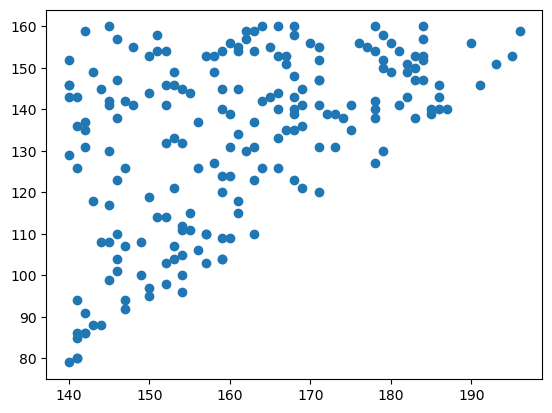

In [11]:
# 정답데이터의 분포
# 산점도 scatter 
# 먼저 하나의 클래스를 가져와서 데이터의 분포 확인(고도비만)
EO = data.loc['Extreme Obesity']
EO
plt.scatter(EO['Height'],EO['Weight'], label = 'Extreme Obesity')

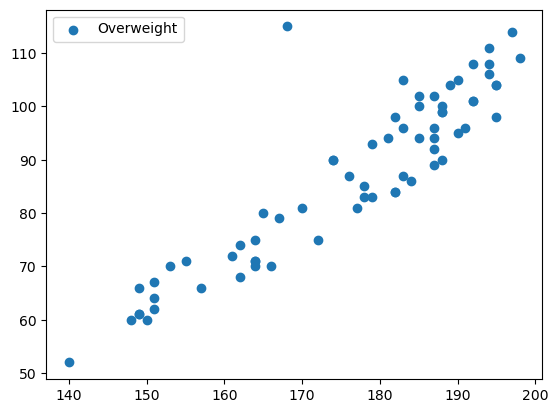

In [12]:
# 과체중 데이터에 대한 분포 그래프
O = data.loc['Overweight']
O
plt.scatter(O['Height'],O['Weight'], label = 'Overweight')

# 범례 
plt.legend()
plt.show()

In [13]:
# 각 범주에 따른 시각화 -> 함수화
def draw (label, color):
    O = data.loc[label]
    plt.scatter(O['Height'], O['Weight'], label = label, color = color)

In [14]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

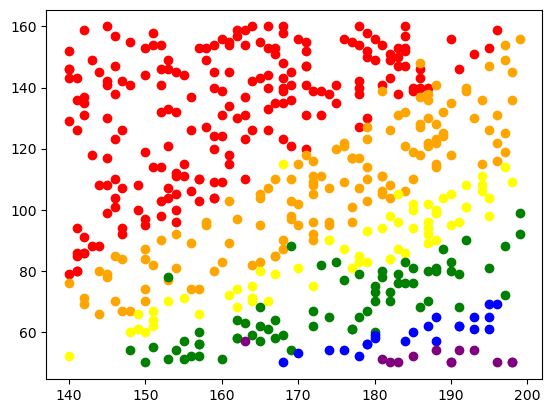

In [15]:
# 그래프를 그리는 함수 가져와서 사용하기
draw('Extreme Obesity', 'red')
draw('Obesity', 'orange')
draw('Overweight', 'yellow')
draw('Normal', 'green')
draw('Weak', 'blue')
draw('Extremely Weak', 'purple')
# 그래프를 보며 전처리에 대한 생각을 해보기~
# 데이터들의 특성을 확인 
# 주황색과 빨간색 사이에 노란색 하나가 있는데 
# 지금은 크게 영향을 미칠것 같지 않으므로 그대로 진행 

In [16]:
# 데이터 확인
print(X.shape, y.shape)

(500, 2) (500,)


In [17]:
X

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61
...,...,...
Extreme Obesity,150,153
Obesity,184,121
Extreme Obesity,141,136


In [18]:
# 학습용, 테스트용 데이터로 분리(70:30)
# train : (0~349) 350개, 150개(test : 350 ~) 분리
# 350개, 150개 분리
# X_train, y_train, X_test, y_test

X_train = X.iloc[ :350 , : ]
y_train = y[ :350]
X_test = X.iloc[350: ,  :  ]
y_test = y[350:]

In [19]:
# 확인
print("훈련용 문제 : ", X_train.shape )
print("훈련용 정답 : ", y_train.shape)
print("테스트용 문제 : ", X_test.shape )
print("테스트용 정답 : ", y_test.shape)

훈련용 문제 :  (350, 2)
훈련용 정답 :  (350,)
테스트용 문제 :  (150, 2)
테스트용 정답 :  (150,)


5. 모델 선택 및 하이퍼 파라미터 조절

In [20]:
# 모델 불러 오기 
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=3)

6. 모델 학습

In [22]:
# 6. 모델 학습
# 모델명.fit(훈련용문제, 훈련용정답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

7. 모델 평가

In [23]:
# 모델 평가
# 모델 예측 (모델이 잘 학습했는지 시험)
# 모델명.predict(테스트용 문제)
pre = knn_model.predict(X_test)
# 실제 정답인 y_test와 비교

In [24]:
# 모델 평가(정확도)
# accuracy_score(예측정답, 실제정답)
accuracy_score(pre, y_test)
# 정확도 : 0~1 사이의 숫자로 출력

0.9